In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('Warsaw_rent_cleaned.csv')
df.head()

,id,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasSecurity,hasStorageRoom,price,date
0,523744ecb14f504e567324fcad116cde,47.0,2.0,52.257912,20.968610,3.76,33.0,yes,yes,no,no,5000,November 2023
1,62b928458d945b2eb9e5a8b94c29d6b9,27.0,1.0,52.249800,21.035200,2.95,33.0,yes,yes,no,no,2950,November 2023
2,ce250f3900a285305906baf45f5f8858,51.0,2.0,52.222864,21.009959,1.08,85.0,no,yes,no,no,3700,November 2023
3,eace41af111d8fc16c0b69d0f2a22ec5,50.0,3.0,52.224948,21.012136,0.95,124.0,no,no,no,no,5000,November 2023
4,66c8701beef1ffbba137456cef6b5271,39.8,2.0,52.216513,21.041474,3.09,6.0,no,no,no,no,4500,November 2023


array([[<Axes: title={'center': 'squareMeters'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'centreDistance'}>,
        <Axes: title={'center': 'poiCount'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

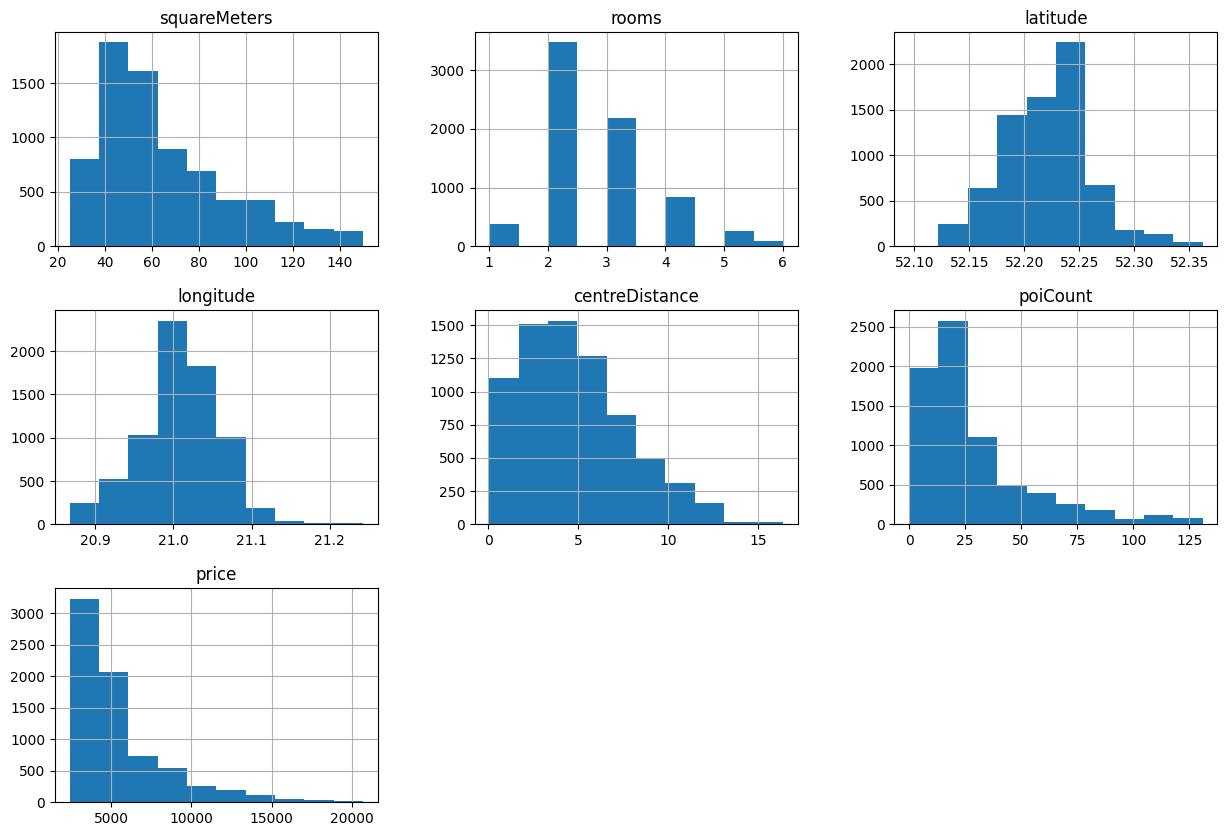

In [11]:
df.hist(figsize=(15,10))

C:\Users\julia\AppData\Local\Temp\ipykernel_9240\1781651064.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


<Axes: >

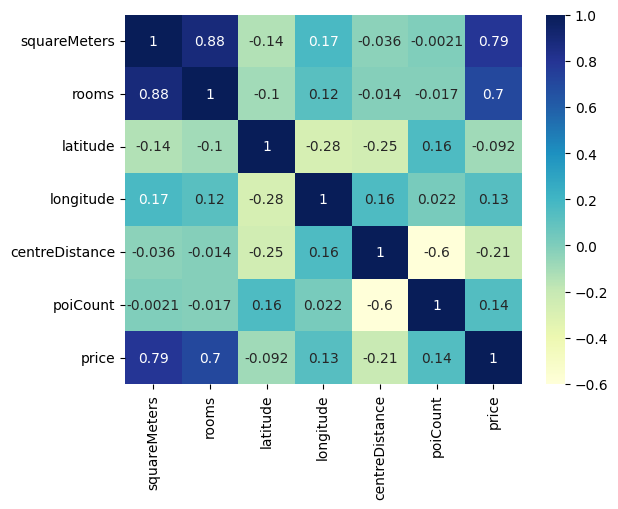

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [3]:
df=df[['squareMeters','price']]
df.head()

,squareMeters,price
0,47.0,5000
1,27.0,2950
2,51.0,3700
3,50.0,5000
4,39.8,4500


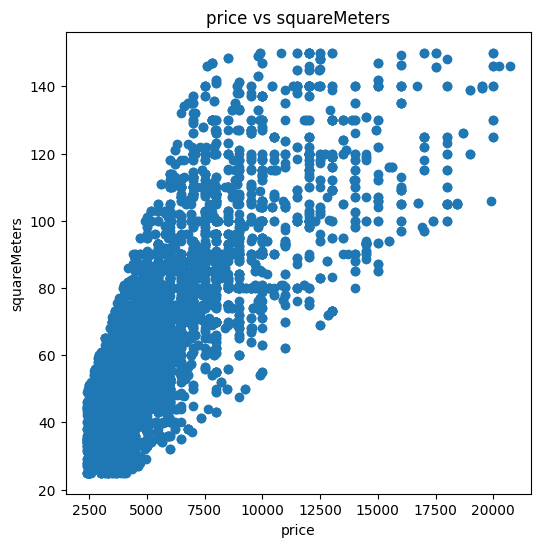

In [4]:
import matplotlib.pyplot as plt

# Tworzenie trzech wykresów obok siebie
plt.figure(figsize=(6, 6))

plt.scatter(df['price'], df['squareMeters'])
plt.xlabel('price')
plt.ylabel('squareMeters')
plt.title('price vs squareMeters')
# Wyświetlanie wykresów
plt.show()


In [5]:
df.shape

(7244, 2)

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

# Wyświetlenie informacji o podziale
print(f"Rozmiar zbioru uczącego: {len(train_set)}")
print(f"Rozmiar zbioru testowego: {len(test_set)}")

Rozmiar zbioru uczącego: 5070
Rozmiar zbioru testowego: 2174


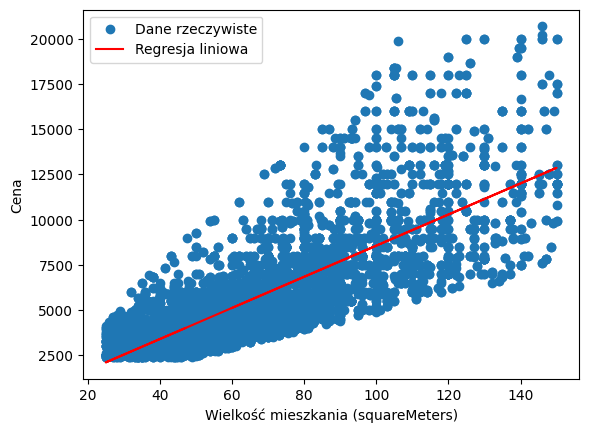

In [7]:
from sklearn.linear_model import LinearRegression

# Przygotowanie danych
X = df[['squareMeters']]  # Zmienna niezależna (wielkość mieszkania)
y = df['price']            # Zmienna zależna (cena)

# Inicjalizacja modelu regresji liniowej
model = LinearRegression()

# Dopasowanie modelu do danych uczących
model.fit(X, y)

# Predykcja na danych uczących
predictions = model.predict(X)

# Wizualizacja wyników
plt.scatter(X, y, label='Dane rzeczywiste')
plt.plot(X, predictions, color='red', label='Regresja liniowa')
plt.xlabel('Wielkość mieszkania (squareMeters)')
plt.ylabel('Cena')
plt.legend()
plt.show()
